# __Credit Card Fraud__

Global E-Commerce market is rapidly rising and estimated to reach $4.9 trillion by 2021. This undoubtedly triggers members of the criminal world to find paths to victims’ wallets through the Web.

Fraud detection experts benefit from machine learning algorithms ability to learn from historical fraud patterns and recoginize them in future transactions. 

__About the Data__

We will be working with data from [Kaggle's Credit Card Fraud Detection.](https://www.kaggle.com/mlg-ulb/creditcardfraud) 

Dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

Set contains only numerical input variables, V1, V2, … V28, which are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Due to confidentiality issues, we are not provided the original features and more background information about the data.

__Research question:__ Can we correctly classify fraudulent transactions amongst a large set of transactions?


### __Imports__

In [ ]:
# imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### __Data download__

In [ ]:
import os
os.getcwd()
card_df = pd.read_csv(r'C:\Users\Elizabeth\Downloads\creditcard.csv.xls')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### __Data Exploration__

To get a high level understanding of the dataframe, we use `dataframe.info()` function, which will return the number of rows in the data frame as well as data type of each column.

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# view the first few rows of data to make sure the file loaded correctly
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Our data has 284,807 observations and 31 columns. The set contains no null values.

__PCA Transformed Features__

Let's take a look at the distribution of the features that underwent PCA to maintain confidentiality. 

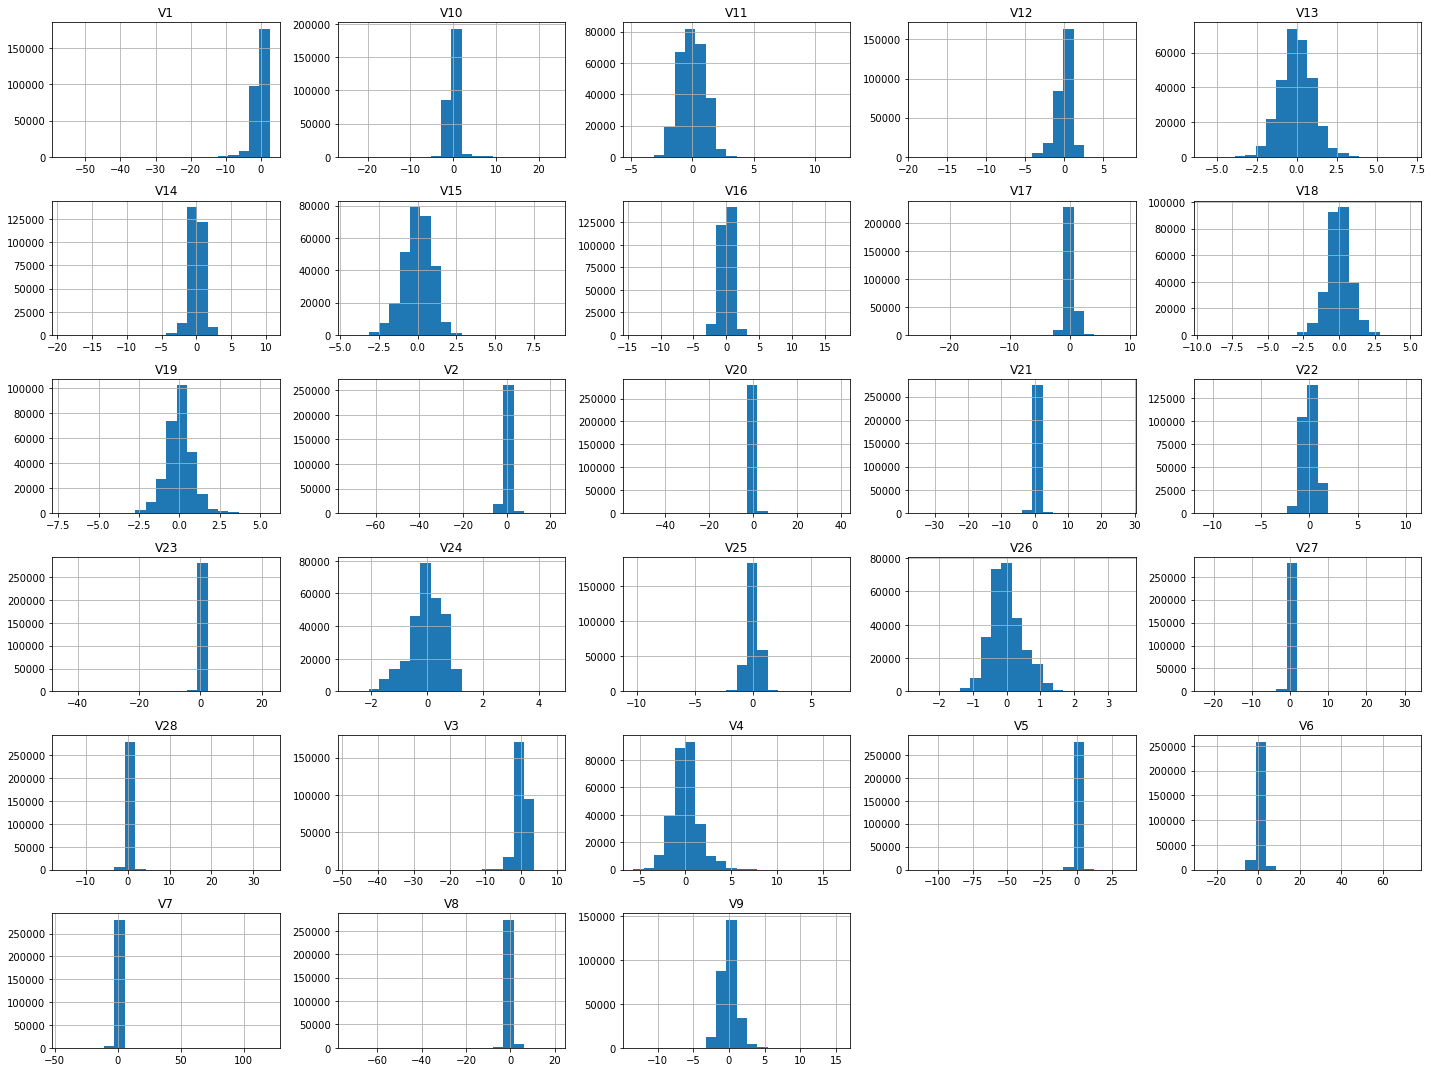

In [ ]:
card_df.drop(['Time', 'Class', 'Amount'], axis=1).hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

We can see that most of our PCA transformed features, V1-V28, are clostured around 0 with what appears to be no visible outliers. 

We will check for outliers after looking into non-PCA transformed features.

__Non-transformed features__
The only features not transformed via PCA are:
*  Time
*  Amount
*  Class

Let's take a closer look at Time and Amount. 

In [ ]:
card_df['time_in_hours'] = card_df['Time'].map(lambda x: x // 3600 % 24)
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_in_hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


__Time Distribution__

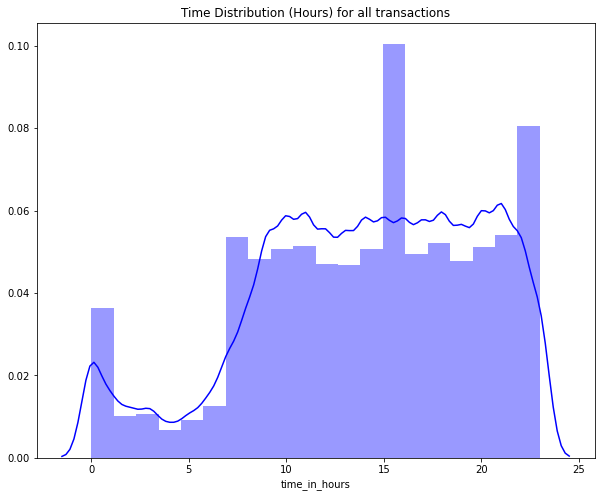

In [ ]:
#plot the time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Hours) for all transactions')

sns.distplot(card_df['time_in_hours'], color='blue', bins=20);

Distribution follows expected trend for normal consumers. Most purchases are made during the day, and as people get out of work or school and head home, purchasing dwindles down until the next day.

__Fraudulent Transactions against Time__

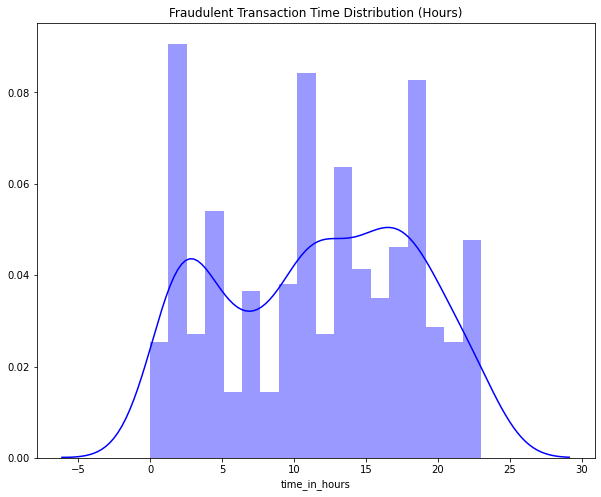

In [ ]:
# plot the time feature of fraud transactions
plt.figure(figsize=(10,8))
plt.title('Fraudulent Transaction Time Distribution (Hours)')
sns.distplot(card_df[card_df.Class==1]['time_in_hours'], color='blue', bins=18)

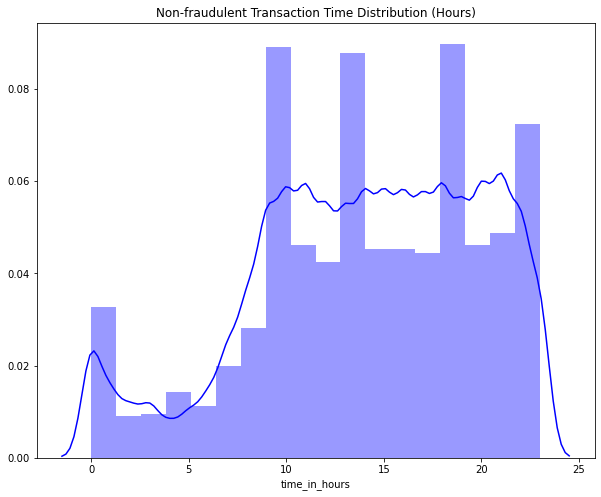

In [ ]:
# plot the time feature of non-fraudulent transactions
plt.figure(figsize=(10,8))
plt.title('Non-fraudulent Transaction Time Distribution (Hours)')
sns.distplot(card_df[card_df.Class==0]['time_in_hours'], color='blue', bins=18)

We can see we have peaks in fraudulent transactions around the same time as the peaks occur in non-fraudulent transactions. This indicates that 'hackers' are keeping track of these patterns and know when to attack to attempt to disguise the transactions. 

We note that fraudulent credit card transactions are more likely to occur between 12AM to 2AM, between 10AM to 11AM, and at one last peak between 3PM and 4PM. 

__Amount__

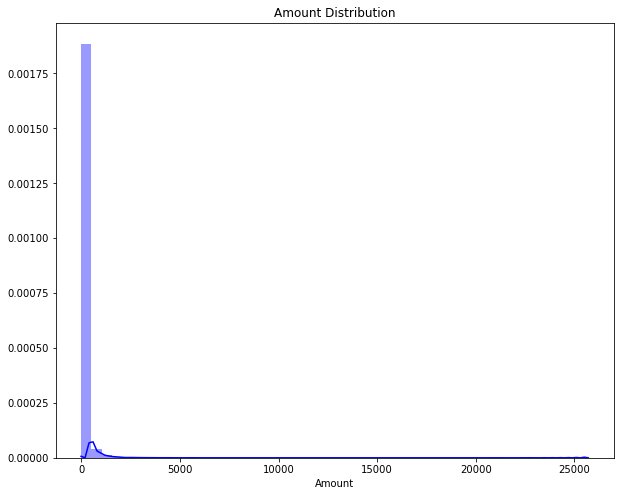

In [ ]:
#plot the amount feature
plt.figure(figsize=(10,8))
plt.title('Amount Distribution')
sns.distplot(card_df['Amount'],color='blue');

The majority of transactions are very low; this distribution is also expected. Most daily transactions aren’t extremely expensive (<$50), but it’s likely where most fraudulent transactions are occurring in this range as well.

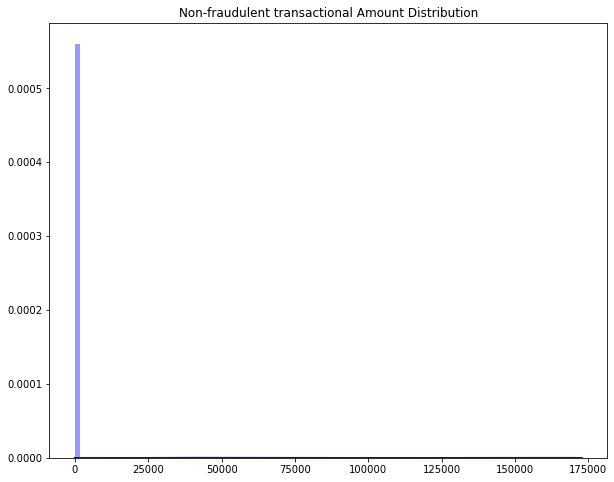

In [ ]:
# plot fraudulent transactions amount distribution
plt.figure(figsize=(10,8))
plt.title('Non-fraudulent transactional Amount Distribution')
sns.distplot(card_df[card_df.Class==0], color='blue', bins=100)

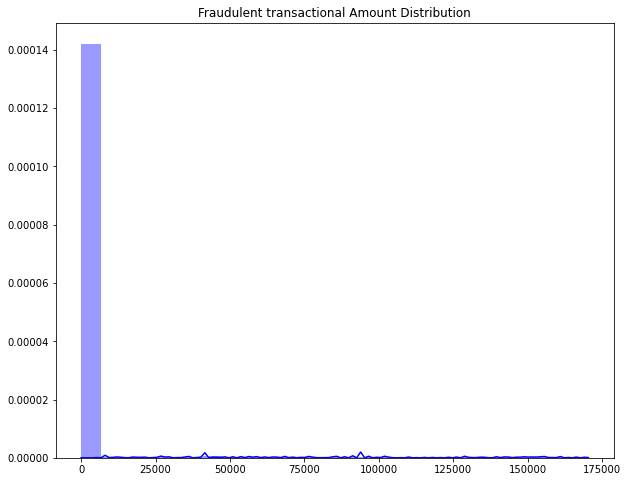

In [ ]:
# plot fraudulent transactions amount distribution
plt.figure(figsize=(10,8))
plt.title('Fraudulent transactional Amount Distribution')
sns.distplot(card_df[card_df.Class==1], color='blue', bins=25)

In [ ]:
card_df[card_df.Class==1].Amount.value_counts().head(5)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64

The monetary value of the top 3 most frequent transactions are in amounts of \$1.00, \$0.00, \$99.99.

In [ ]:
card_df[card_df.Class==1].Amount.sort_values(ascending=False).head(5)

176049    2125.87
6971      1809.68
249167    1504.93
89190     1402.16
81609     1389.56
Name: Amount, dtype: float64

The top 3 highest fraudulent transactions are \$2125.87, \$1809.68, \$1504.93.

__Features with relation to class__

<Figure size 432x288 with 0 Axes>

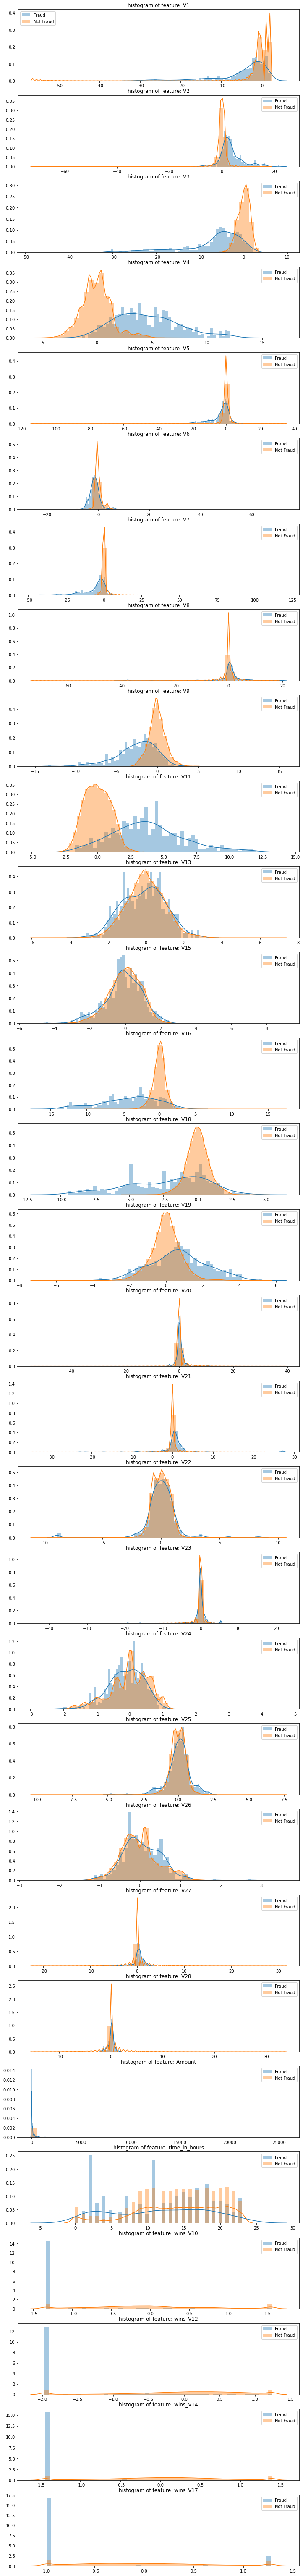

In [ ]:
# Reference - https://www.kaggle.com/currie32/d/dalpozz/creditcardfraud/predicting-fraud-with-tensorflow
import matplotlib.gridspec as gridspec
plt.clf()
features = card_df.columns.drop("Class")
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(30, 1)
for i, col in enumerate(card_df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(card_df[col][card_df.Class == 1], bins=50, label='Fraud')
    sns.distplot(card_df[col][card_df.Class == 0], bins=50, label='Not Fraud')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(col))
    plt.legend()
plt.show()

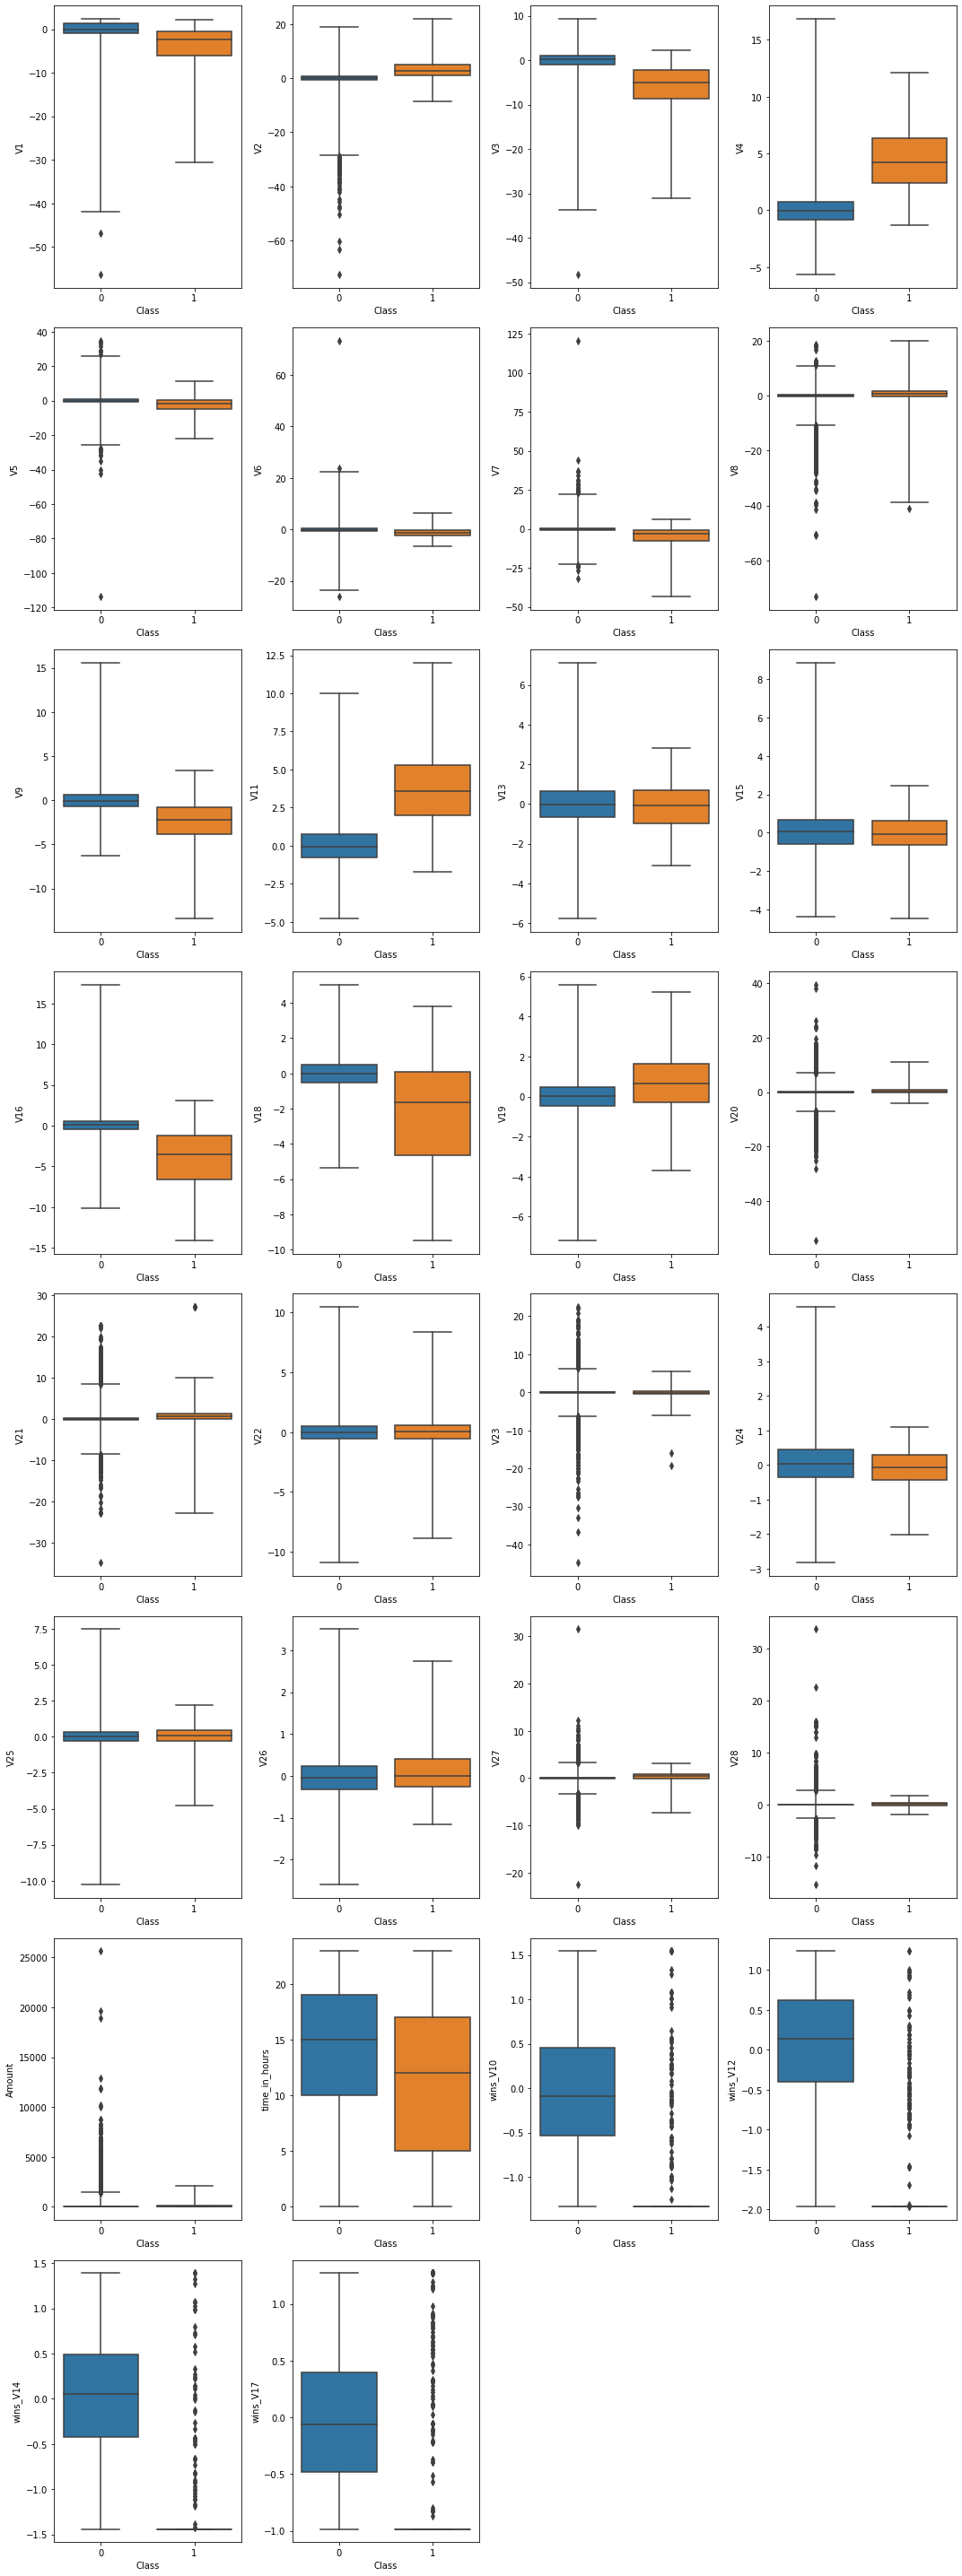

In [ ]:
plt.figure(figsize=(15,40))
features = card_df.columns.drop("Class")

for i in range(len(features)):
    plt.subplot(8,4, i+1)  ; sns.boxplot(x='Class',y=features[i],data=card_df, whis=20)

plt.tight_layout()

From above histograms and boxplots, we note that the distributions between fraudulent and non-fraudulent transactions follows a similar pattern for some features such as V13, V15, V22, and V23. Other features show drastic differences between classes such as V4, V11, and V16. These features are one's that we should keep a closer eye on as values do not follow a similar distribution pattern to non-fraudulent transactions. 

__*Correlations*__

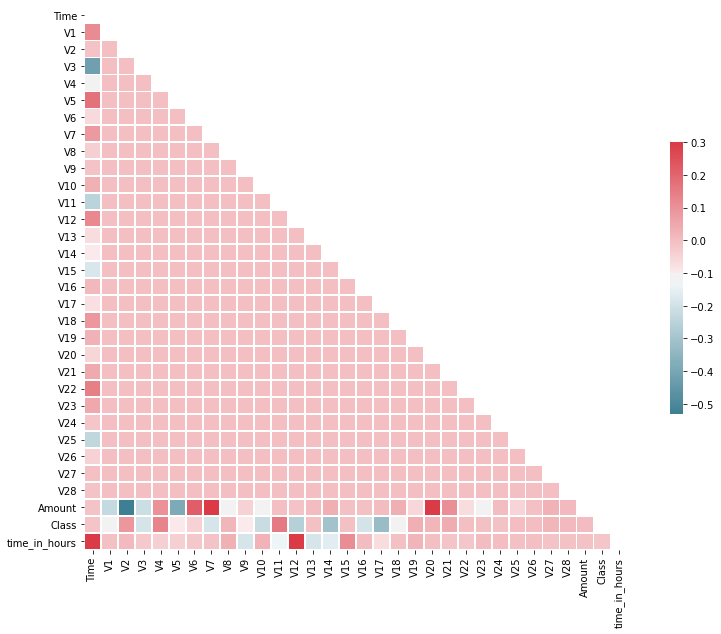

In [ ]:
corr = card_df.corr()

# masking the upper triangle part of the matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5})

We found some features showing higher correlation to our target variable:V10, V12, V14, and V17. 

Let's take a closer look at the correlations for these. 

In [ ]:
correlations = card_df[card_df.columns[1:]].corr()['Class'][:].abs()
sorted_corr = correlations.sort_values(ascending=False)
sorted_corr.head(10)

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

Our correlations for the features in question are low enough we should not face multi-colinearity and would be okay to proceed. However, I will apply winsorization to these features to treat any outliers.  

__*Outliers?*__

Our aim below is to remove any outliers on the features mentioned above that have a higher correlation to our target variable. This should help with our model accuracies.

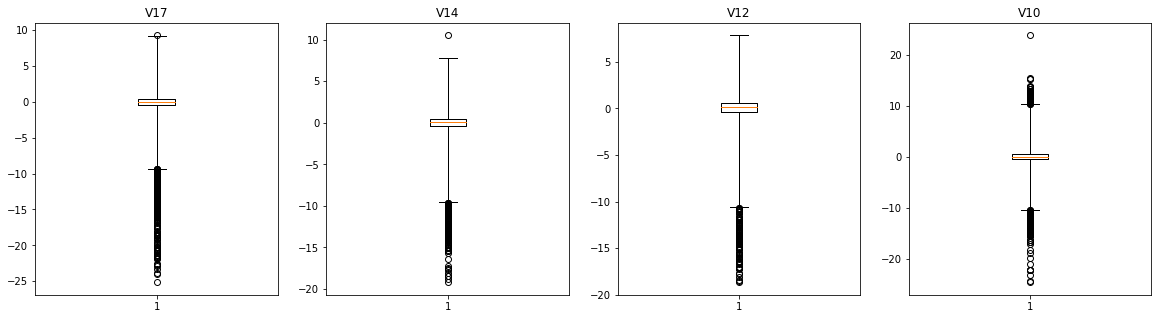

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5))
axes[0].boxplot(card_df.V17, whis=10)
axes[0].set_title('V17')

axes[1].boxplot(card_df.V14, whis=10)
axes[1].set_title('V14')

axes[2].boxplot(card_df.V12, whis=10)
axes[2].set_title('V12')

axes[3].boxplot(card_df.V10, whis=10)
axes[3].set_title('V10')
plt.show()

In [ ]:
# outliers in feature V17
q75, q25 = np.percentile(card_df["V17"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((card_df["V17"] > max_val) 
                      | (card_df["V17"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 16690
The score threshold is: 1.5
Number of outliers is: 7420
The score threshold is: 2.0
Number of outliers is: 3957
The score threshold is: 2.5
Number of outliers is: 2348
The score threshold is: 3.0
Number of outliers is: 1449
The score threshold is: 3.5
Number of outliers is: 988
The score threshold is: 4.0
Number of outliers is: 698
The score threshold is: 4.5
Number of outliers is: 566


In [ ]:
# outliers in feature V14
q75, q25 = np.percentile(card_df["V12"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((card_df["V14"] > max_val) 
                      | (card_df["V14"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 23287
The score threshold is: 1.5
Number of outliers is: 10234
The score threshold is: 2.0
Number of outliers is: 5136
The score threshold is: 2.5
Number of outliers is: 2984
The score threshold is: 3.0
Number of outliers is: 1654
The score threshold is: 3.5
Number of outliers is: 1072
The score threshold is: 4.0
Number of outliers is: 797
The score threshold is: 4.5
Number of outliers is: 614


In [ ]:
# outliers in feature V12
q75, q25 = np.percentile(card_df["V12"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((card_df["V12"] > max_val) 
                      | (card_df["V12"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 25696
The score threshold is: 1.5
Number of outliers is: 15348
The score threshold is: 2.0
Number of outliers is: 8259
The score threshold is: 2.5
Number of outliers is: 3540
The score threshold is: 3.0
Number of outliers is: 1305
The score threshold is: 3.5
Number of outliers is: 547
The score threshold is: 4.0
Number of outliers is: 370
The score threshold is: 4.5
Number of outliers is: 320


In [ ]:
# outliers in feature V10
q75, q25 = np.percentile(card_df['V10'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((card_df['V10'] > max_val) 
                      | (card_df['V10'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 27821
The score threshold is: 1.5
Number of outliers is: 9496
The score threshold is: 2.0
Number of outliers is: 5766
The score threshold is: 2.5
Number of outliers is: 4124
The score threshold is: 3.0
Number of outliers is: 3208
The score threshold is: 3.5
Number of outliers is: 2610
The score threshold is: 4.0
Number of outliers is: 2138
The score threshold is: 4.5
Number of outliers is: 1793


__Treating the Outliers__

In [ ]:
# applying winsorization to outliers
from scipy.stats.mstats import winsorize

card_df['wins_V10'] = winz_v10 = winsorize(card_df["V10"], (0.05, 0.05))
card_df['wins_V12'] = winz_v12 = winsorize(card_df["V12"], (0.05, 0.05))
card_df['wins_V14'] = winz_v14 = winsorize(card_df["V14"], (0.05, 0.05))
card_df['wins_V17'] = winz_v17 = winsorize(card_df["V17"], (0.05, 0.05))

In [ ]:
card_df = card_df.drop(['V10', 'V12', 'V14', 'V17', 'Time'], axis=1)

Dropping the 'Time' feature as we added a feature converting seconds to hours

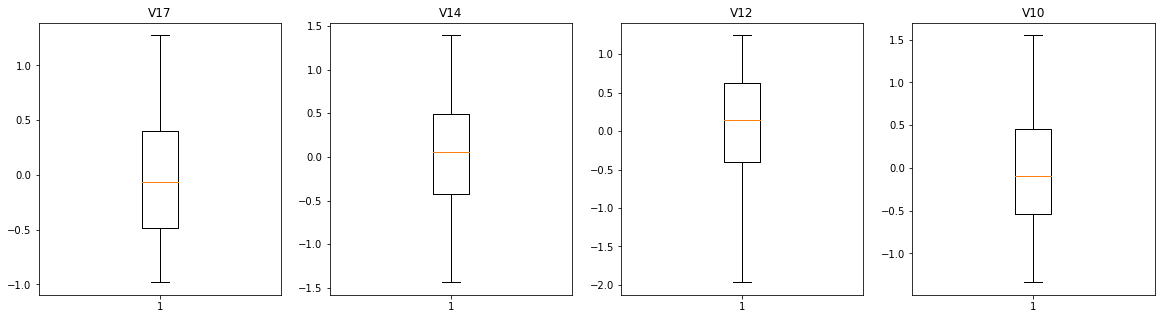

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5))
axes[0].boxplot(card_df.wins_V17, whis=10)
axes[0].set_title('V17')
axes[1].boxplot(card_df.wins_V14, whis=10)
axes[1].set_title('V14')
axes[2].boxplot(card_df.wins_V12, whis=10)
axes[2].set_title('V12')
axes[3].boxplot(card_df.wins_V10, whis=10)
axes[3].set_title('V10')
plt.show()

*__Class Imbalance__*

Our data has high imbalance. Our transactions contain 99.8% non-fraudulent transactions and 0.17% of fradulent transactions. 
We will take care of the imbalance prior to modeling.

Data imbalance is a common occurence in machine learning classification. It occurs when there is a disproportionate ratio of observations in each class. It is common when dealing with data from disease screening, spam filtering, and fraud detection.

Below are visuals and percentages of the imbalance.

In [ ]:
# The classes are heavily skewed, which needs to be addressed before modeling
print('Non-fraud transactions', round(card_df['Class'].value_counts()[0]/len(card_df) * 100,2), '% of the dataset')
print('Fraud transactions make up', round(card_df['Class'].value_counts()[1]/len(card_df) * 100,2), '% of the dataset')
print('Total number of frauds in dataset: {}'.format(len(card_df[card_df.Class==1])))

Non-fraud transactions 99.83 % of the dataset
Fraud transactions make up 0.17 % of the dataset
Total number of frauds in dataset: 492


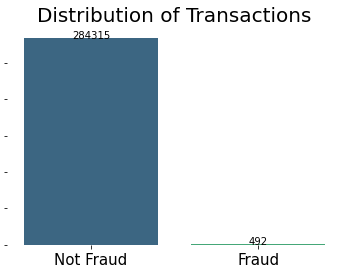

In [ ]:
# use seaborn to visualize below of drastic imbalance in data
fig, ax = plt.subplots()
g = sns.countplot(card_df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Our correlations for the features in question is low enough we should not face multi-colinearity. 

### __Data Pre-processing__


__Handling the data imbalance__
* The techniques I'll be utilizing to overcome the issue of class imbalance will be:
 * __Oversampling__ - increasing the number of minority class in the training set
 * __Undersampling__ - decreasing the number of majority class in the training set 

In [ ]:
# separating our input features and target for our imbalanced data
X = card_df.drop('Class', axis=1)
y = card_df.Class

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# count in each set
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 227845
The number of observations in test set is 56962


In [ ]:
# concatenate training data back together before up/down sampling
X = pd.concat([X_train, y_train], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V26,V27,V28,Amount,time_in_hours,wins_V10,wins_V12,wins_V14,wins_V17,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,0.624996,...,-0.216780,0.045168,-0.047145,9.99,15.0,-0.030441,1.243067,-0.253266,-0.930844,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,-1.945070,...,0.361924,-0.370469,-0.144792,45.90,8.0,0.611115,-0.726597,-1.193347,-0.983009,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,0.521931,...,0.119690,0.206395,0.070288,11.99,17.0,-0.638222,-0.072768,-0.640249,0.044374,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,-0.855437,...,-0.181038,-0.093013,-0.064931,117.44,2.0,0.560595,-1.967163,1.271254,-0.613260,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,0.472626,...,0.245335,0.286904,-0.322672,25.76,22.0,1.221746,1.243067,0.187685,0.007803,0


In [ ]:
#------------- Upsampling -------------
from sklearn.utils import resample

# separate majority and minority classes
card_notfraud = X[X.Class == 0] # majority
card_fraud = X[X.Class == 1] # minority
  
# ------------- upsample minority class -------------
fraud_upsampled = resample(card_fraud,
                              replace = True,     # sample with replacement
                              n_samples = len(card_notfraud), # to match majority class
                              random_state=123)   # reproducible results

# combine majority class with upsampled minority class
upsampled = pd.concat([card_notfraud, fraud_upsampled])

# dispaly new class counts
upsampled.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [ ]:
# The classes after oversampling
print('Non-fraud transactions', round(upsampled['Class'].value_counts()[0]/len(upsampled) * 100,2), '% of the dataset')
print('Fraud transactions make up', round(upsampled['Class'].value_counts()[1]/len(upsampled) * 100,2), '% of the dataset')
print('Total number of frauds in dataset: {}'.format(len(upsampled[upsampled.Class==1])))

Non-fraud transactions 50.0 % of the dataset
Fraud transactions make up 50.0 % of the dataset
Total number of frauds in dataset: 227451


In [ ]:
# separate input features and target variable for UPSAMPLED data
X_train_up = upsampled.drop("Class", axis=1)
y_train_up = upsampled.Class

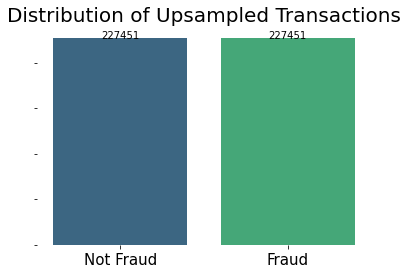

In [ ]:
fig, ax = plt.subplots()
g = sns.countplot(upsampled.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Upsampled Transactions', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [ ]:
#------------- downsampled majority class -------------
notfraud_downsampled = resample(card_notfraud,
                                replace=False,       # sample without replacement
                                n_samples = len(card_fraud),     # to match minority class
                                random_state = 123) # reproducible results

# combining minority class with downsampled majority class
downsampled = pd.concat([card_fraud, notfraud_downsampled])

# dispaly new class counts
downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [ ]:
# The classes after oversampling
print('Non-fraud transactions', round(downsampled['Class'].value_counts()[0]/len(downsampled) * 100,2), '% of the dataset')
print('Fraud transactions make up', round(downsampled['Class'].value_counts()[1]/len(downsampled) * 100,2), '% of the dataset')
print('Total number of frauds in dataset: {}'.format(len(downsampled[downsampled.Class==1])))

Non-fraud transactions 50.0 % of the dataset
Fraud transactions make up 50.0 % of the dataset
Total number of frauds in dataset: 394


In [ ]:
# separate input features and target variable for DOWNSAMPLED
X_train_down = downsampled.drop("Class", axis=1)
y_train_down = downsampled.Class

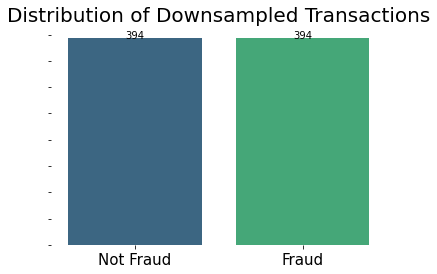

In [ ]:
fig, ax = plt.subplots()
g = sns.countplot(downsampled.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Downsampled Transactions', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Now that we have handled our imbalanced data by over and under sampling, we will begin running our models and compare the results metrics at the end. 

### __Modeling__

__Models chosen__
>* __Linear Regression__
* __Decision Trees__ 
* __Gradient Boosting Classifier__


__Dummy Classifier__

Below I utilized a dummy classifier to test accuracy when only predicting non-fraud transactions(0). 

In [ ]:
# dummy classifier to predict the most frequesnt class, in our case, 0
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)

# checking accuracy
print("Test score: {}".format(dummy.score(X_test, y_test)))

Test score: 0.9982795547909132


__Accuracy__

Accuracy score as a metric with imbalanced datasets will be unusually high and misleading. We will instead use the following metrics: 
* __F1 score:__ weighted average of precision and recall
* __Precision:__ number of true positives divided by all positive predictions
* __Recall:__ number of true positives divided by the number of positive values in the test data. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
* __Confusion matrix:__ shows correct predictions and types of incorrect predictions.

# ***Baseline Models***

__Paramater tuning__

In [ ]:
# parameters we'll be using to tune our models
lr_params = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'class_weight': ['balanced', 'None']} # logistic regression parameters

dtc_params = {"criterion": ["gini", "entropy"], "max_depth": [3,5,7,10,20], 
              'max_features': [3,5,10,20]} # decision tree parameters

gb_params = {'n_estimators': [20,40,70], 'max_depth':[3,5,7], 'max_features':[3,5,7]} # gradient boost parameters

In [ ]:
# LOGISTIC REGRESSION
grid_LR = GridSearchCV(LogisticRegression(), lr_params)
grid_LR.fit(X_train, y_train)
lr = grid_LR.best_estimator_ # GridSearch logistic regression with the best parameters

# DECISION TREE ecisionTree Classifier
grid_DT = GridSearchCV(DecisionTreeClassifier(), dtc_params)
grid_DT.fit(X_train, y_train)
dtc = grid_DT.best_estimator_ # tree best parameters

# GRADIENT BOOSTING
grid_GB = GridSearchCV(GradientBoostingClassifier(), gb_params)
grid_GB.fit(X_train, y_train)
gb = grid_GB.best_estimator_ # gradient boost best parameters

print('LR best params', grid_LR.best_estimator_, '\n LR best Score ', grid_LR.best_score_)
print('DT best params', grid_DT.best_estimator_, '\n DT best Score ', grid_DT.best_score_)
print('GB best params', grid_GB.best_estimator_, '\n GB best Score ', grid_GB.best_score_)

LR best params LogisticRegression(C=0.1, class_weight='None') 
 LR best Score  0.9992582676819767
DT best params DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=20) 
 DT best Score  0.9993987140380522
GB best params GradientBoostingClassifier(max_depth=5, max_features=7, n_estimators=20) 
 GB best Score  0.9991090434286468


In [ ]:
# instantiate the classfiers and make a list
classifiers = [lr,
               dtc,
               gb,
               dummy]

# Define a result and metrics table as a DataFrame
baseline_results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
baseline_metrics = pd.DataFrame(columns=['classifiers', 'F1','Precision','Recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  y_preds)
    auc = roc_auc_score(y_test, y_preds)

    baseline_results = baseline_results.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    baseline_metrics = baseline_metrics.append({'classifiers':cls.__class__.__name__,
                                            'F1':f1,
                                            'Precision':precision,
                                            'Recall':recall}, ignore_index=True)

    if cls.__class__.__name__ != 'DummyClassifier':
        if cls.__class__.__name__ == 'LogisticRegression':
            importance = model.coef_[0]
            print(cls.__class__.__name__)
            # summarize feature importance
            for i,v in enumerate(importance):
                print("Feature: {}, Score: {} ".format(X_train_down.columns[i],v))
            print()
        else:
            print(cls.__class__.__name__)
            for i,v in enumerate(X_train_down.columns):
                print('Feature: {} Score: {}'.format(v, cls.feature_importances_[i]))
            print()
    
# Set name of the classifiers as index labels
baseline_results.set_index('classifiers', inplace=True)

LogisticRegression
Feature: V1, Score: 0.08740944281536736 
Feature: V2, Score: -0.31365659000934604 
Feature: V3, Score: -0.16011945821356038 
Feature: V4, Score: 0.5145198544475247 
Feature: V5, Score: -0.3348796737267948 
Feature: V6, Score: 0.1396881452952231 
Feature: V7, Score: 0.25125174794560806 
Feature: V8, Score: -0.32988294708737614 
Feature: V9, Score: -0.6488322714272072 
Feature: V11, Score: -0.08503462741894618 
Feature: V13, Score: -0.4262192543272615 
Feature: V15, Score: -0.12053903512002963 
Feature: V16, Score: -0.23778134577783624 
Feature: V18, Score: 0.09651280701649234 
Feature: V19, Score: -0.18488525781096782 
Feature: V20, Score: 0.9700911423971655 
Feature: V21, Score: 0.5526081443940333 
Feature: V22, Score: 0.029390903111662873 
Feature: V23, Score: -0.32686839212347313 
Feature: V24, Score: -0.12919837727887148 
Feature: V25, Score: -0.15246792082814362 
Feature: V26, Score: -0.009781524535360967 
Feature: V27, Score: -0.3804655786556837 
Feature: V28, S

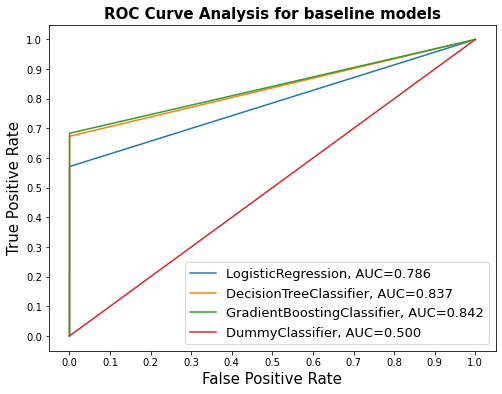

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in baseline_results.index:
    plt.plot(baseline_results.loc[i]['fpr'], 
             baseline_results.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, baseline_results.loc[i]['auc']))
    
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for baseline models', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

---
**_Oversampled_**





__Paramater tuning__

In [ ]:
# LOGISTIC REGRESSION
grid_LR_over = GridSearchCV(LogisticRegression(), lr_params)
grid_LR_over.fit(X_train_up, y_train_up)
lr_over = grid_LR_over.best_estimator_ # GridSearch logistic regression with the best parameters

# DECISION TREE ecisionTree Classifier
grid_DT_over = GridSearchCV(DecisionTreeClassifier(), dtc_params)
grid_DT_over.fit(X_train_up, y_train_up)
dtc_over = grid_DT_over.best_estimator_ # tree best parameters

# GRADIENT BOOSTING
grid_GB_over = GridSearchCV(GradientBoostingClassifier(), gb_params)
grid_GB_over.fit(X_train_up, y_train_up)
gb_over = grid_GB_over.best_estimator_ # gradient boost best parameters

# dummy classifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train_up, y_train_up)

print('LR oversampled best params', grid_LR_over.best_estimator_, '\n LR best Score ', grid_LR_over.best_score_)
print('DT oversampled best params', grid_DT_over.best_estimator_, '\n DT best Score ', grid_DT_over.best_score_)
print('GB oversampled best params', grid_GB_over.best_estimator_, '\n GB best Score ', grid_GB_over.best_score_)

LR oversampled best params LogisticRegression(C=0.0001, class_weight='None') 
 LR best Score  0.9433526311331834
DT oversampled best params DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=10) 
 DT best Score  0.9997515948441608
GB oversampled best params GradientBoostingClassifier(max_depth=7, max_features=5, n_estimators=70) 
 GB best Score  0.9997450000123106


In [ ]:
# Instantiate the classfiers with best parameters and make a list
classifiers = [lr_over,
               dtc_over,
               gb_over,
               dummy]

# Define a result and metrics table as a DataFrame
result_table_up = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
scores_table_up = pd.DataFrame(columns=['classifiers', 'F1','Precision','Recall'])

# Train the models and record the results
for cls in classifiers:
  model = cls.fit(X_train_up, y_train_up)
  y_preds_up = model.predict(X_test)

  fpr, tpr, _ = roc_curve(y_test,  y_preds_up)
  auc = roc_auc_score(y_test, y_preds_up)

  result_table_up = result_table_up.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr,
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
  
  precision = precision_score(y_test, y_preds_up)
  recall = recall_score(y_test, y_preds_up)
  f1 = f1_score(y_test, y_preds_up)
  scores_table_up = scores_table_up.append({'classifiers':cls.__class__.__name__,
                                            'F1':f1,
                                            'Precision':precision,
                                            'Recall':recall}, ignore_index=True)


  if cls.__class__.__name__ != 'DummyClassifier':
        if cls.__class__.__name__ == 'LogisticRegression':
            importance = model.coef_[0]
            print(cls.__class__.__name__)
            # summarize feature importance
            for i,v in enumerate(importance):
                print("Feature: {}, Score: {} ".format(X_train_down.columns[i],v))
            print()
        else:
            print(cls.__class__.__name__)
            for i,v in enumerate(X_train_down.columns):
                print('Feature: {} Score: {}'.format(v, cls.feature_importances_[i]))
            print()
    
# Set name of the classifiers as index labels
result_table_up.set_index('classifiers', inplace=True)
scores_table_up

LogisticRegression
Feature: V1, Score: 0.02264272827501272 
Feature: V2, Score: 0.06923655523667979 
Feature: V3, Score: -0.15240560166487258 
Feature: V4, Score: 0.6451543503839163 
Feature: V5, Score: 0.0583504585719234 
Feature: V6, Score: -0.17518276888688988 
Feature: V7, Score: -0.027599201402173843 
Feature: V8, Score: -0.154906821959081 
Feature: V9, Score: -0.14164011190480624 
Feature: V11, Score: 0.3167033267756605 
Feature: V13, Score: -0.027792939515528935 
Feature: V15, Score: -0.0929939108582028 
Feature: V16, Score: -0.2259352550311466 
Feature: V18, Score: 0.022641167159306985 
Feature: V19, Score: -0.04986903563762706 
Feature: V20, Score: -0.03344282159674979 
Feature: V21, Score: 0.1294916036827039 
Feature: V22, Score: 0.2108354762201197 
Feature: V23, Score: -0.11192665076171822 
Feature: V24, Score: -0.05927112067880773 
Feature: V25, Score: 0.02989493606099557 
Feature: V26, Score: -0.19492935332777866 
Feature: V27, Score: 0.06223524614832499 
Feature: V28, Sco

,classifiers,F1,Precision,Recall
0,LogisticRegression,0.145902,0.079323,0.908163
1,DecisionTreeClassifier,0.660793,0.581395,0.765306
2,GradientBoostingClassifier,0.820755,0.763158,0.887755
3,DummyClassifier,0.000000,0.000000,0.000000


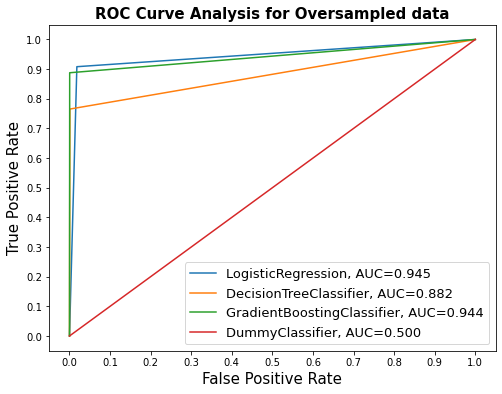

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table_up.index:
    plt.plot(result_table_up.loc[i]['fpr'], 
             result_table_up.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_up.loc[i]['auc']))
    
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Oversampled data', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

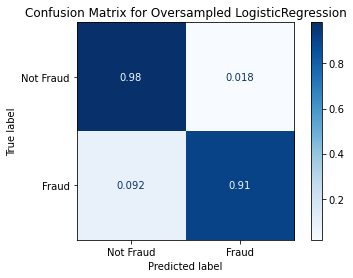

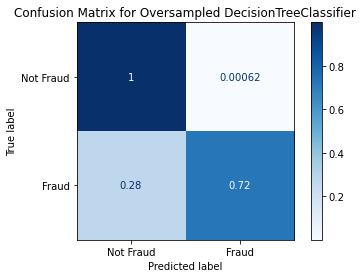

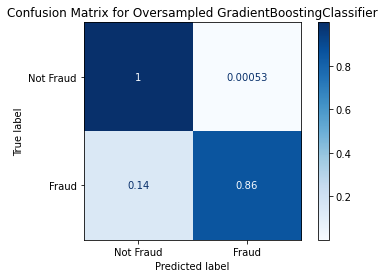

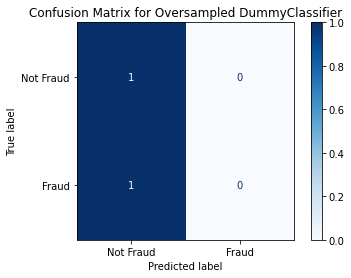

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# generate confusion matrices
for cls in classifiers:
  model = cls.fit(X_train_up, y_train_up)
  matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=['Not Fraud', 'Fraud'])
  plt.title('Confusion Matrix for Oversampled {}'.format(cls.__class__.__name__))
  plt.show(matrix)
  plt.show()

---
**_Undersampled_**





__Paramater tuning__

In [ ]:
# dummy classifier to predict the most frequesnt class, in our case, 0
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train_down, y_train_down)

# checking accuracy
print("Test score: {}".format(dummy.score(X_test, y_test)))

Test score: 0.9982795547909132


In [ ]:
# LOGISTIC REGRESSION
grid_LR_under = GridSearchCV(LogisticRegression(), lr_params)
grid_LR_under.fit(X_train_down, y_train_down)
lr_under = grid_LR_under.best_estimator_ # GridSearch logistic regression with the best parameters

# DECISION TREE ecisionTree Classifier
grid_DT_under = GridSearchCV(DecisionTreeClassifier(), dtc_params)
grid_DT_under.fit(X_train_down, y_train_down)
dtc_under = grid_DT_under.best_estimator_ # tree best parameters

# GRADIENT BOOSTING
grid_GB_under = GridSearchCV(GradientBoostingClassifier(), gb_params)
grid_GB_under.fit(X_train_down, y_train_down)
gb_under = grid_GB_under.best_estimator_ # gradient boost best parameters

# dummy classifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train_down, y_train_down)

print('LR undersampled best params', grid_LR_under.best_estimator_, '\n LR best Score ', grid_LR_under.best_score_)
print('DT undersampled best params', grid_DT_under.best_estimator_, '\n DT best Score ', grid_DT_under.best_score_)
print('GB undersampled best params', grid_GB_under.best_estimator_, '\n GB best Score ', grid_GB_under.best_score_)

LR undersampled best params LogisticRegression(C=0.1, class_weight='None') 
 LR best Score  0.93404821414174
DT undersampled best params DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=20) 
 DT best Score  0.9149721841489962
GB undersampled best params GradientBoostingClassifier(max_depth=7, max_features=5, n_estimators=20) 
 GB best Score  0.9353301620575667


In [ ]:
# instantiate the classfiers with undersampled best params and make a list
classifiers = [lr_under, 
               dtc_under,
               gb_under,
               dummy]

# Define a result table as a DataFrame
result_table_down = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
scores_table_down = pd.DataFrame(columns=['classifiers', 'F1','Precision','Recall'])

# Train the models and record the results
for cls in classifiers:
  model = cls.fit(X_train_down, y_train_down)
  y_preds = model.predict(X_test)
  
  fpr, tpr, _ = roc_curve(y_test,  y_preds)
  auc = roc_auc_score(y_test, y_preds)

  result_table_down = result_table_down.append({'classifiers':cls.__class__.__name__,
                                                'fpr':fpr,
                                                'tpr':tpr, 
                                                'auc':auc}, ignore_index=True)
  
  precision = precision_score(y_test, y_preds)
  recall = recall_score(y_test, y_preds)
  f1 = f1_score(y_test, y_preds)
  scores_table_down = scores_table_down.append({'classifiers':cls.__class__.__name__,
                                        'F1':f1, 
                                        'Precision':precision, 
                                        'Recall':recall}, ignore_index=True)

  if cls.__class__.__name__ != 'DummyClassifier':
        if cls.__class__.__name__ == 'LogisticRegression':
            importance = model.coef_[0]
            print(cls.__class__.__name__)
            # summarize feature importance
            for i,v in enumerate(importance):
                print("Feature: {}, Score: {} ".format(X_train_down.columns[i],v))
            print()
        else:
            print(cls.__class__.__name__)
            for i,v in enumerate(X_train_down.columns):
                print('Feature: {} Score: {}'.format(v, cls.feature_importances_[i]))
            print()
    
# Set name of the classifiers as index labels
result_table_down.set_index('classifiers', inplace=True)

LogisticRegression
Feature: V1, Score: -0.054814847033456876 
Feature: V2, Score: -0.1700573279942242 
Feature: V3, Score: -0.13100815709853825 
Feature: V4, Score: 0.6866857682754504 
Feature: V5, Score: -0.1485150946858608 
Feature: V6, Score: -0.27280446811793285 
Feature: V7, Score: 0.013289511432422761 
Feature: V8, Score: -0.16341829019545692 
Feature: V9, Score: -0.26954654058976446 
Feature: V11, Score: 0.1290045897252881 
Feature: V13, Score: -0.33355529242023146 
Feature: V15, Score: -0.056119566387975404 
Feature: V16, Score: -0.17605588212650053 
Feature: V18, Score: -0.11644030668950864 
Feature: V19, Score: 0.1041717167173972 
Feature: V20, Score: -0.25253905194784365 
Feature: V21, Score: 0.16035572991850292 
Feature: V22, Score: 0.3487504691998957 
Feature: V23, Score: -0.26856409667117837 
Feature: V24, Score: -0.1806658656840955 
Feature: V25, Score: 0.15674012893413666 
Feature: V26, Score: -0.28238382737610135 
Feature: V27, Score: 0.10700987588325868 
Feature: V28,

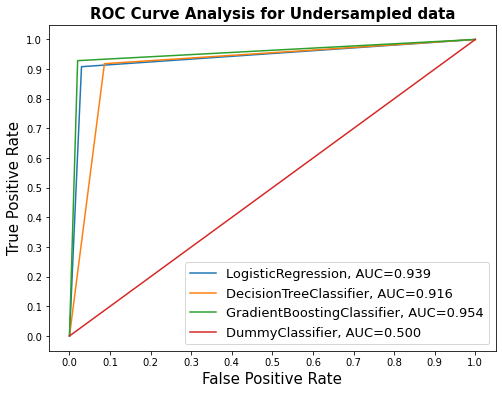

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table_down.index:
    plt.plot(result_table_down.loc[i]['fpr'], 
             result_table_down.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_down.loc[i]['auc']))
    
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampled data', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

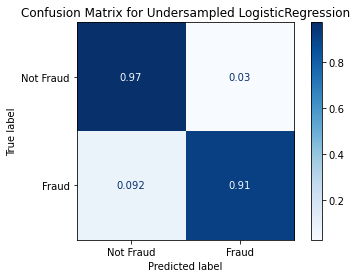

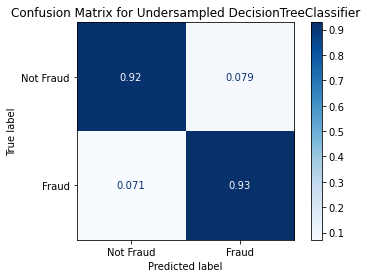

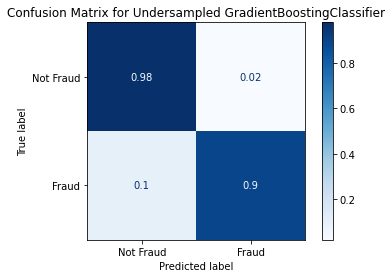

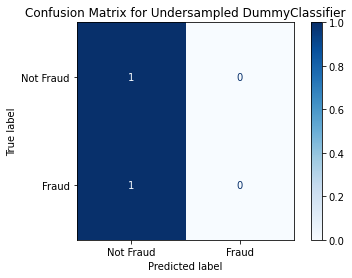

In [ ]:
for cls in classifiers:
  model = cls.fit(X_train_down, y_train_down)
  matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 display_labels=['Not Fraud', 'Fraud'])
  plt.title('Confusion Matrix for Undersampled {}'.format(cls.__class__.__name__))
  plt.show(matrix)
  plt.show()

__Results:__

Compare results of models with upsampled and downsampled data.

In [ ]:
baseline_metrics.head(3)

,classifiers,F1,Precision,Recall
0,LogisticRegression,0.670659,0.811594,0.571429
1,DecisionTreeClassifier,0.771930,0.904110,0.673469
2,GradientBoostingClassifier,0.744444,0.817073,0.683673


In [ ]:
scores_table_up.head(3)

,classifiers,F1,Precision,Recall
0,LogisticRegression,0.145902,0.079323,0.908163
1,DecisionTreeClassifier,0.660793,0.581395,0.765306
2,GradientBoostingClassifier,0.820755,0.763158,0.887755


In [ ]:
scores_table_down.head(3)

,classifiers,F1,Precision,Recall
0,LogisticRegression,0.095238,0.050254,0.908163
1,DecisionTreeClassifier,0.035405,0.018051,0.918367
2,GradientBoostingClassifier,0.136842,0.073864,0.928571


We note that we had a significant improvement in our recall scores when oversampling and undersampling. However, this came at a cost since our Precision and F1-score suffered.

After reviewing all the metrics above, the model that provides us with the best results is Gradient Boosting Classifier. While its highest recall score was with the downsampled data, I believe the upsampled dataset provided better results as it has increased f1 and precision scores.

__Conclusion__

We have met our goal of accurately classifying credit card transactions as fraudulent or not. 


Main challenge faced during this project was centered around the data imbalance and resampling. For future revisions, I'd like to experiment different ratios of fraud to non-fraud for all models  to test accuracies of models when the data is not entirely balanced. Finding a 'golden ratio' of data balance would help with overfitting and underfitting while training models. 

Upon checking feature importances for each model, I noted some features did not have any importance in predicting our class. As a future improvement, I would remove these features and run the models again. 

From the first submission, I noticed a significant improvement in the precision and f1 scores in both over and under sampled data by treating a few more correlated variables with winsorization. I only selected the most correlated features to do the outlier treatment and and noted a significant improvement and believe performance would drastically improve with all features were treated.   
